# Copernicus data

In [2]:
import copernicusmarine
from pprint import pprint
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd

## Download data

In [3]:
username = 'mjessen'
password = 'gM-Rzb4cS4Lwudk'
dataset_id = 'cmems_obs-ins_glo_phybgcwav_mynrt_na_irr'
part = 'latest'
params_cat = 'waves'
feature = 'TS'

start_date = '2024-01-01'
end_date = '2024-01-02'

north = 56
south = 50
west = -2
east = 10

### Create files to download 

In [4]:
df = pd.read_csv("copernicus-data/index_monthly.txt", skiprows=5)
print(df.shape)
df.columns

(542559, 12)


Index(['# product_id', 'file_name', 'geospatial_lat_min', 'geospatial_lat_max',
       'geospatial_lon_min', 'geospatial_lon_max', 'time_coverage_start',
       'time_coverage_end', 'institution', 'date_update', 'data_mode',
       'parameters'],
      dtype='object')

In [5]:
with open("stations.txt", "r") as f:
    station_files = [line.strip() for line in f if line.strip()]

station_files

['AkkaertSouthwestBuoy',
 'WaddenEierlandseGat',
 'DeutscheBuchtBuoy',
 'Fanoebugt',
 'KeetenBoei',
 'MaeslantkeringZeezijdeNoordMeetpaal',
 'NorderneyBuoy',
 'Nymindegab',
 'OverloopVanValkenisse',
 'StortemelkOost',
 'RyeBayDWR',
 'SandownPierTG',
 'SwanagePierTG']

In [8]:
import re

pattern = "|".join(re.escape(s) for s in station_files)  # escape in case of special characters
pattern

'AkkaertSouthwestBuoy|WaddenEierlandseGat|DeutscheBuchtBuoy|Fanoebugt|KeetenBoei|MaeslantkeringZeezijdeNoordMeetpaal|NorderneyBuoy|Nymindegab|OverloopVanValkenisse|StortemelkOost|RyeBayDWR|SandownPierTG|SwanagePierTG'

In [9]:
# Filter by location and parameters
filtered_df = df[(df['geospatial_lat_min'] > south) &
                 (df['geospatial_lat_max'] < north) &
                 (df['geospatial_lon_min'] > west) &
                 (df['geospatial_lon_max'] < east) &
                 (df['geospatial_lon_max'] == df['geospatial_lon_min'] ) &
                 (df['geospatial_lat_max'] == df['geospatial_lat_min'] ) &
                 (df['parameters'].str.contains("VGHS", na=False) | (df['parameters'].str.contains("VHM0", na=False)) | (df['parameters'].str.contains("VAVH", na=False))) 
                # & (df['parameters'].str.contains("VTM02", na=False))
                 & (df['file_name'].str.contains('202401'))
                 & (df['file_name'].str.contains(pattern, na=False))
                ]

print(filtered_df.shape)

file_df = filtered_df[['file_name']].copy()
#file_df

(13, 12)


In [10]:
filtered_df.shape

(13, 12)

In [11]:
stations_data = []

for station in station_files:
    for name in filtered_df['file_name']:
        if station in name:
            row = filtered_df[filtered_df['file_name'] == name]
            lat, lon = row['geospatial_lat_min'].values[0], row['geospatial_lon_min'].values[0]
            stations_data.append({'station': station, 'lat': lat, 'lon': lon})

station_df = pd.DataFrame(stations_data)
station_df

,station,lat,lon
0,AkkaertSouthwestBuoy,51.41600,2.81900
1,WaddenEierlandseGat,53.27694,4.66167
2,DeutscheBuchtBuoy,54.29664,5.79447
3,Fanoebugt,55.34600,8.23000
4,KeetenBoei,51.60800,3.96600
5,MaeslantkeringZeezijdeNoordMeetpaal,51.96100,4.15900
6,NorderneyBuoy,53.74950,7.11865
7,Nymindegab,55.81000,7.94100
8,OverloopVanValkenisse,51.37151,4.13717
9,StortemelkOost,53.32240,5.10250


In [12]:
# Save to CSV
station_df.to_csv('stations.csv', index=False)

In [89]:
with open("output.txt", "w") as f:
    for filename in file_df["file_name"]:
        f.write(str(filename) + "\n")


In [141]:
file_list = 'files_to_download.txt'
file_list = 'output.txt'
file_list

'output.txt'

In [71]:
# Define output storage parameters
output_directory = './raw-data'

In [120]:
for station in station_files:
    print(station)

AkkaertSouthwestBuoy
WaddenEierlandseGat
DeutscheBuchtBuoy
Fanoebugt
KeetenBoei
MaeslantkeringZeezijdeNoordMeetpaal
NorderneyBuoy
Nymindegab
OverloopVanValkenisse
StortemelkOost
RyeBayDWR
SandownPierTG
SwanagePierTG


In [143]:
# Download the file to the station folder 
copernicusmarine.get(
    username=username,
    password=password,
    dataset_id=dataset_id,
    index_parts=False,
    file_list = file_list,
    output_directory=output_directory,
    no_directories=True
)


INFO - 2025-07-04T09:07:46Z - Selected dataset version: "202311"
INFO - 2025-07-04T09:07:46Z - Selected dataset part: "latest"


ResponseGet(files=[FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/MO/202401/NO_TS_MO_AkkaertSouthwestBuoy_202401.nc', https_url='https://s3.waw3-1.cloudferro.com/mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/MO/202401/NO_TS_MO_AkkaertSouthwestBuoy_202401.nc', file_size=0.12404060363769531, last_modified_datetime='2025-02-17T20:52:31+00:00', etag='"48616876b0bb654b5f603d4241a9f15f"', file_format='.nc', output_directory=WindowsPath('raw-data'), filename='NO_TS_MO_AkkaertSouthwestBuoy_202401.nc', file_path=WindowsPath('raw-data/NO_TS_MO_AkkaertSouthwestBuoy_202401.nc'), file_status='DOWNLOADED'), FileGet(s3_url='s3://mdl-native-01/native/INSITU_GLO_PHYBGCWAV_DISCRETE_MYNRT_013_030/cmems_obs-ins_glo_phybgcwav_mynrt_na_irr_202311/monthly/MO/202402/NO_TS_MO_AkkaertSouthwestBuoy_202402.nc', https_url='https://s3.waw3-1.cloudf

In [55]:
if 1:    
    get_result = copernicusmarine.get(
        username = username,
        password = password,
        dataset_id=dataset_id,
        index_parts = False,
        file_list = file_list,
        output_directory=output_directory,
        no_directories=True)

INFO - 2025-07-04T07:54:25Z - Selected dataset version: "202311"
INFO - 2025-07-04T07:54:25Z - Selected dataset part: "latest"


## Load data

In [144]:
path = './raw-data/observations'
file = 'NO_TS_MO_WaddenEierlandseGat_202406.nc'
#file = 'AR_PR_BO_58GS_202005.nc'

ds = xr.open_dataset(path + '/' + file)

In [145]:
ds.data_vars

Data variables:
    TIME_QC  (TIME) int8 4kB ...
    VTPK     (TIME, DEPTH) float32 34kB ...
    VTPK_QC  (TIME, DEPTH) float32 34kB ...
    VAVT     (TIME, DEPTH) float32 34kB ...
    VAVT_QC  (TIME, DEPTH) float32 34kB ...
    TEMP     (TIME, DEPTH) float32 34kB ...
    TEMP_QC  (TIME, DEPTH) float32 34kB ...
    VAVH     (TIME, DEPTH) float32 34kB ...
    VAVH_QC  (TIME, DEPTH) float32 34kB ...
    SWHT     (TIME, DEPTH) float32 34kB ...
    SWHT_QC  (TIME, DEPTH) float32 34kB ...
    VTZA     (TIME, DEPTH) float32 34kB ...
    VTZA_QC  (TIME, DEPTH) float32 34kB ...
    VMDR     (TIME, DEPTH) float32 34kB ...
    VMDR_QC  (TIME, DEPTH) float32 34kB ...
    VHM0     (TIME, DEPTH) float32 34kB ...
    VHM0_QC  (TIME, DEPTH) float32 34kB ...

### Plot wave height

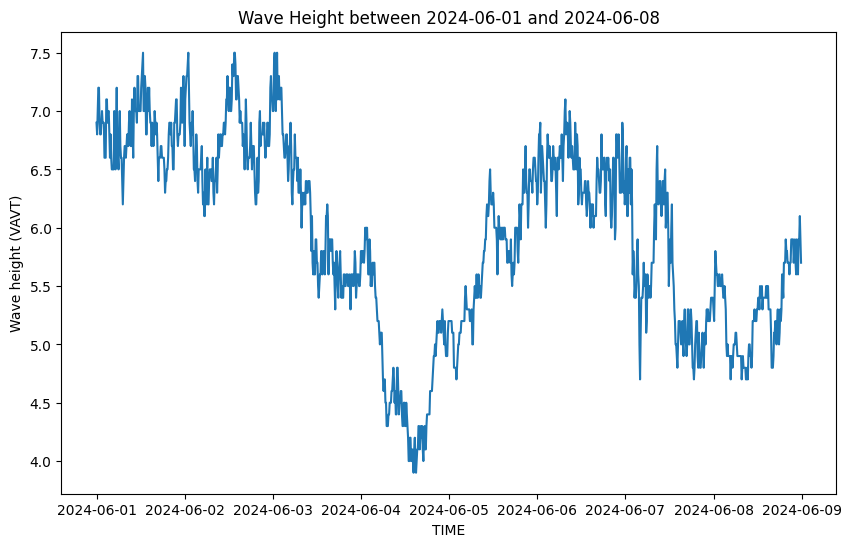

In [153]:
start_date = '2024-06-01'
end_date = '2024-06-08'


plt.figure(figsize=(10, 6))
# Select data for the specified time range
subset_data = ds.sel(TIME=slice(start_date, end_date))
VAVT = subset_data.VAVT
VHM0 = subset_data.VHM0
DEPH = subset_data.DEPH

plt.title('Wave Height between {} and {}'.format(start_date, end_date))
plt.xlabel('TIME')
plt.ylabel('Wave height (VAVT)')
plt.plot(subset_data.TIME,VAVT)
plt.show()